<a href="https://colab.research.google.com/github/sefakocakalay/cardiovascular/blob/main/Lisans_Tezi_Sefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [4]:
import io

df = pd.read_csv(io.BytesIO(uploaded['cardio_train.csv']),sep=";")

In [5]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.test.is_gpu_available())

TF Version:  2.4.1
TF-Hub version:  0.11.0
Eager mode enabled:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available:  True


In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11596948513190743947, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5328061201681560984
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]




---

---



---



---



---



---



---





---



---



---



---



---






---



---



---



---


---


---



---



---



---



---



---



---


---



---



---



---



---



---



---





---



---



---



---



---



---



---



---



---



---





---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---


---



---



---



---



---



---


---



---



---



---



---


---




# <font color='red'>Kardiyovasküler Hastalık Tahmini</font>

##### *Sefa KOCAKALAY*

* Giriş
* Veriyi Anlama
* Özellik Mühendisliği (f.e)
   - Veri Temizleme ve Keşifci Veri Analizi
      - Aykırı Değerler(Outliers)
      - Eksik veriler(Missing Values)
   - Veri Manipülasyonu
* Veri Görselleştirme
* Modelleme
  - Model Optimizasyonu
  - GridSearchCV
* Model Değerlendirmesi
* Uygulama
* Sonuç

# <font color='red'>Giriş</font>

![](https://www.diyetisyenbengisuesen.com/wp-content/uploads/kardiyovaskuler-hastaliklar-ve-beslenme.jpg)

# Kardiyovasküler Sistem ve Kardiyovasküler Hastalıklar Nedir ?
###### Kalp, damar, atardamar ve toplardamarlarımızın tümü kardiyovasküler sistem olarak bilinir. Kardiyovasküler sistem, yaşamamız ve sağlıklı olmamız için elzemdir. Vücudumuza oksijen götürmek için kanı kalbimizden ciğerlerimize, oradan da tüm vücudumuza taşır. Kardiyovasküler hastalığı olan kişilerde, vücut, yapması gereken bu önemli görevleri yerine getiremez.

###### Kardiyovasküler hastalıklar, kalp veya kan damarlarının (arterler ve venler) hastalıklarını içeren gruba verilen genel bir isimlendirmedir.Kardiyovasküler hastalık dolaşım sistemini etkileyen herhangi bir hastalığı tanımlar. Özellikle kalp hastalıkları, beyin ve böbrek damarlarını etkileyen hastalıklar ve periferik damar hastalıkları bu gruba girer.




--------------------------------------------------------------------------------





# Verinin Tanımlanması


 
 
Özellikler(Features):

Age(Yaş) | Objective Feature | age | int (days) |

Height(Boy) | Objective Feature | height | int (cm) |

Weight(Kilo) | Objective Feature | weight | float (kg) |

Gender(Cinsiyet) | Objective Feature | gender | categorical code |

Systolic blood pressure(Sistolik kan basıncı) | Examination Feature | ap_hi | int |

Diastolic blood pressure(Diyastolik kan basıncı) | Examination Feature | ap_lo | int |

Cholesterol(Kolesterol) | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose(Glikoz) | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking(Sigara) | Subjective Feature | smoke | binary |

Alcohol intake(Alkol) | Subjective Feature | alco | binary |

Physical activity(Fiziksel Aktivite) | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease(KVH var mı yok mu?) | Target Variable | cardio | binary |

Tüm veri seti değerleri tıbbi muayene anında toplanmıştır.

# Veri Bilimi Proje Döngüsü(CRISP-DM Metodolojisi)



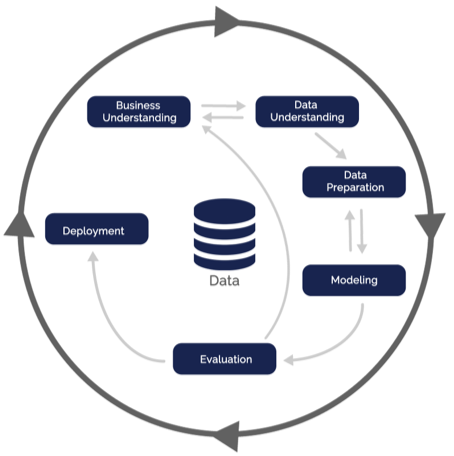

CRISP – DM (Cross Industry Standard Process Model for Data Mining), veri madenciliği projelerinin yürütülmesinde izlenen yol haritası olarak kısaca tanımlanabilir.
Veri madenciliğinde ortak yaklaşımları ifade eden açık standart bir süreç modeli olmasının yanında, aynı zamanda en çok kullanılan analitik modeldir.

# <font color='red'>Veriyi Anlama</font>

In [7]:
# gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from matplotlib import rcParams 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics as metrics
from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_recall_fscore_support
from lightgbm import plot_tree
import lightgbm as lgb
import sklearn
from sklearn import metrics
!pip install joblib
import joblib
import time
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore")

In [8]:
df.head() #veriye ilk bakış

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
print(f'Veri Boyutu: {df.shape}') #verinin boyutu

Veri Boyutu: (70000, 13)


In [10]:
df.info() #özet bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
df.columns # özellikler

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# <font color='red'>Veri Temizleme ve Keşifci Veri Analizi </font>

In [12]:
df.describe().T #istatistiksel ilk bakış

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [13]:
df.groupby('cardio')[['cholesterol', 'gluc']].agg(['min', 'max', 'mean']) # gruplandırma

cholesterol               gluc              
               min max      mean  min max      mean
cardio                                             
0                1   3  1.216527    1   3  1.175380
1                1   3  1.517396    1   3  1.277595

### <font color='red'>Eksik Veriler </font>


In [14]:
df.isnull().sum() #eksik veri var mı

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [15]:
df.duplicated().sum() #tekrarlayan değerler

0

In [16]:
df['age_year'] = (df['age'] / 365).round().astype('int') # günden yıla

In [17]:
df.drop(['age','id'], axis=1, inplace=True) #gereksizleri atma

### <font color='red'>Aykırı Değerler </font>

In [18]:
#standartlaştırma
x = df.copy(deep=True)
stand = ["age_year", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in stand:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)


In [19]:
x_melt = pd.melt(frame=x_std, id_vars="cardio", value_vars=stand, var_name="features", value_name="value", col_level=None)

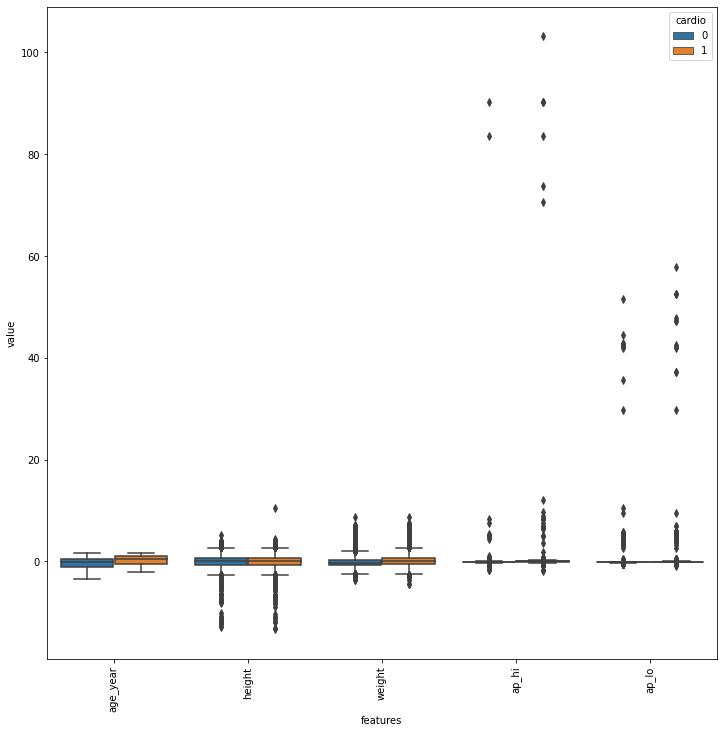

In [20]:
plt.figure(figsize=(12,12))
sns.boxplot(x="features", y="value", hue="cardio", data=x_melt)
plt.xticks(rotation=90);

In [22]:
##Z Score
#df_replaced_1 = df_out.copy()
#outliers={}
#for col in df_out:
#    z_score = zscore(df_out[col])
#    upper_replace_value = df_out[z_score<=3][col].max()
#    lower_replace_value = df_out[z_score>=-3][col].min()
#    df_replaced_1 = df_out.copy()
#    outliers[col] = len(df_replaced_1[col][(df_replaced_1[col] > upper_replace_value)| (df_replaced_1[col] < lower_replace_value)])
#outliers_zscore=pd.DataFrame(outliers.items(),columns=['Feature','Outliers'])
#print("Outlier Z Score:\n",outliers_zscore)

In [23]:
##IQR outliers
#df_2_replaced = df_out.copy()
#outliers_1={}
#for col in df_out:
#    q1 = df_out[col].quantile(q=0.15)
#    q3 = df_out[col].quantile(q=0.85)
#    iqr = stats.iqr(df_out[col]) 
#    df_2_replaced = df_out.copy()
#    upper_limit = q3 + 1.5*iqr
#    lower_limit = q1 - 1.5*iqr
#    outliers_1[col] = len(df_2_replaced[col][(df_2_replaced[col] > upper_limit)| (df_2_replaced[col] < lower_limit)])
#outliers_iqr=pd.DataFrame(outliers_1.items(),columns=['Feature','Outliers'])
#print("IQR Outliers:\n",outliers_iqr)

In [24]:
#Hard Edge Outliers
#df_3_replaced = df_out.copy()
#outliers_2={}
#for col in df_out:
#    lower_lim = df_out[col].quantile(q=0.01)
#    upper_lim = df_out[col].quantile(q=0.99)
#    outliers_2[col] = len(df_3_replaced[col][(df_3_replaced[col] > upper_lim)| (df_3_replaced[col] < lower_lim)])
#outliers_hard=pd.DataFrame(outliers_2.items(),columns=['Feature','Outliers'])
#print("Hard Edge Outliers:\n",outliers_hard) 

In [25]:
outliers = ((df["ap_hi"]>200) | (df["ap_lo"]>185) | (df["ap_lo"]<50) | (df["ap_hi"]<=80) | (df["height"]<=100)
             | (df["weight"]<=35) )
print("Toplam {} Aykırı Değer".format(df[outliers]["cardio"].count()))

Toplam 1465 Aykırı Değer


In [26]:
y = df.cardio
x = df.drop('cardio',axis = 1 ) # bağımlı, bağımsız değişkenler

In [27]:
df = df[~outliers] #az zaten attık

# <font color='red'>Veri Görselleştirme</font>

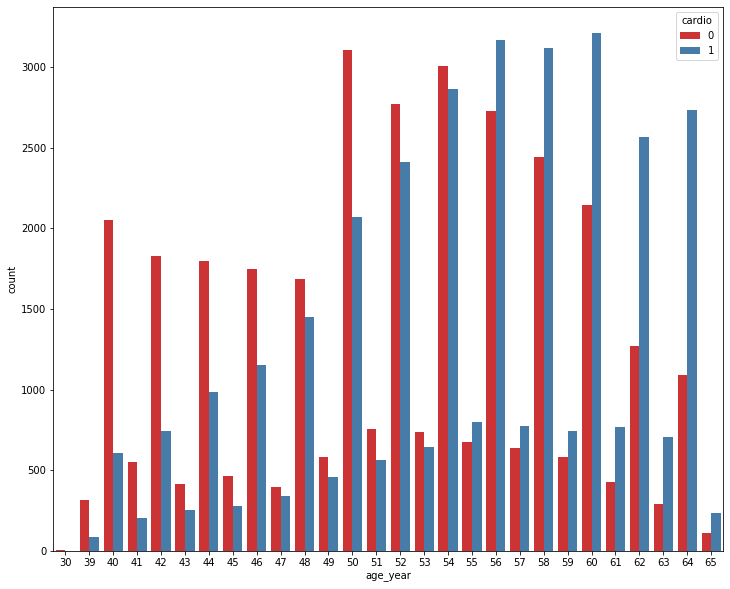

In [28]:
rcParams['figure.figsize'] = 12, 10
sns.countplot(x='age_year', hue='cardio', data = df, palette="Set1");

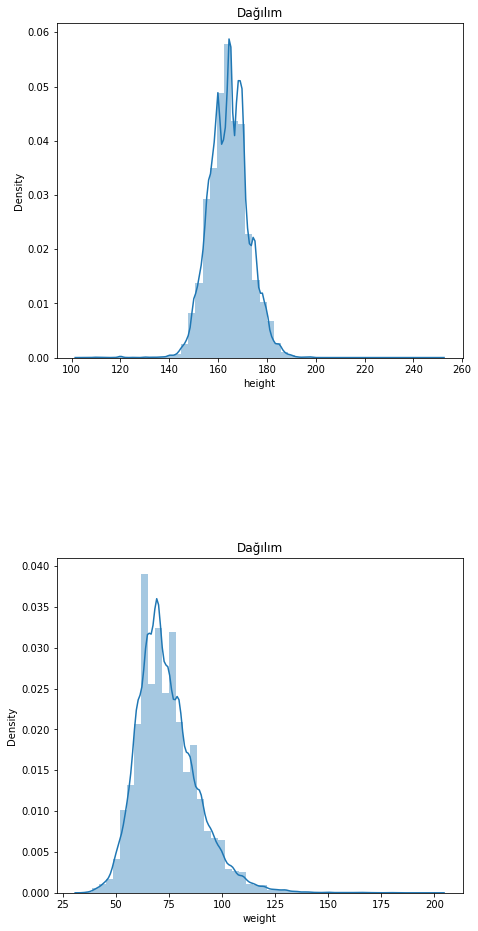

In [29]:
fig, ax = plt.subplots(figsize = (16, 16))

plt.subplot(2,2,1)
sns.distplot(df['height'])
plt.title('Dağılım')


plt.subplot(2,2,3)
sns.distplot(df['weight'])
plt.title('Dağılım')


plt.subplots_adjust(hspace= 0.6)
plt.show()

In [30]:
def half_corr_heatmap(df, title=None):
    plt.figure(figsize=(12,10))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(df.corr())
    mask[np.tril_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(df.corr(), mask=mask, annot=True, cmap="coolwarm",linewidths=.5,fmt= '.1f')
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

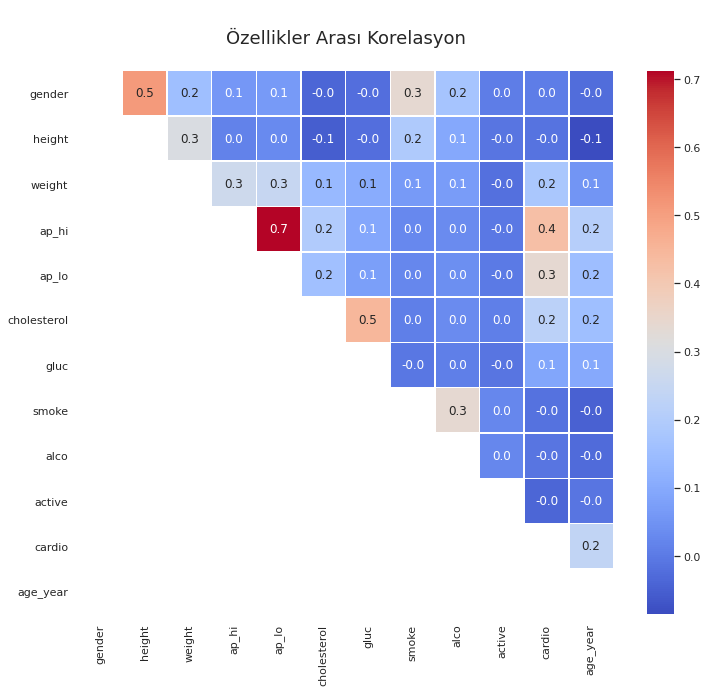

In [31]:
half_corr_heatmap(df, 'Özellikler Arası Korelasyon')

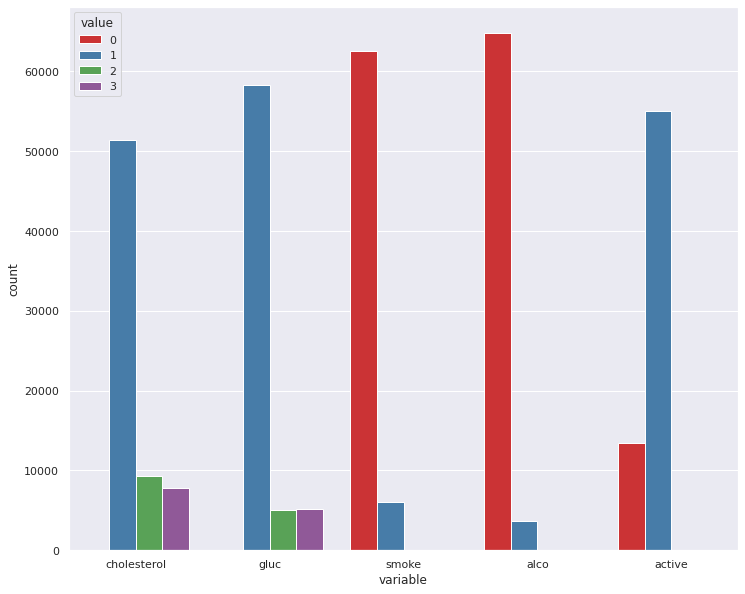

In [32]:
sns.countplot(x="variable", hue="value",data= pd.melt(df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]),palette="Set1");

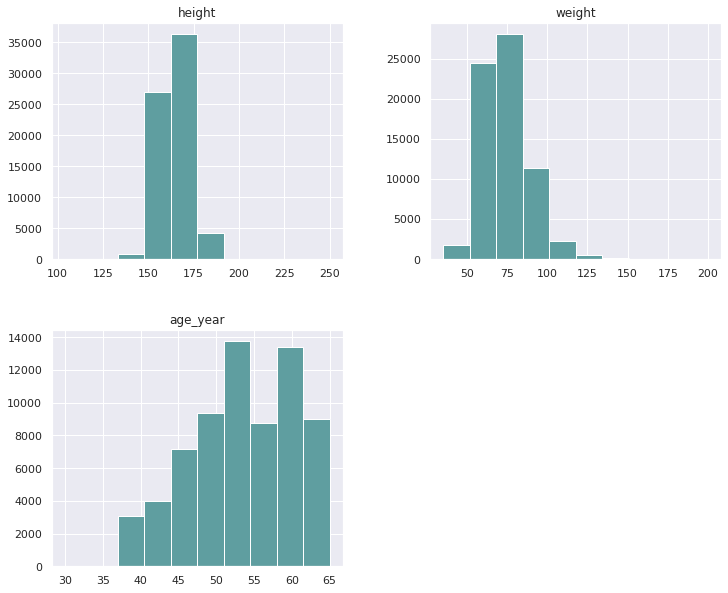

In [33]:
numerik = df[['height', 'weight','age_year']].copy()
df_plot = numerik.hist(figsize = (12,10), color = "#5F9EA0")

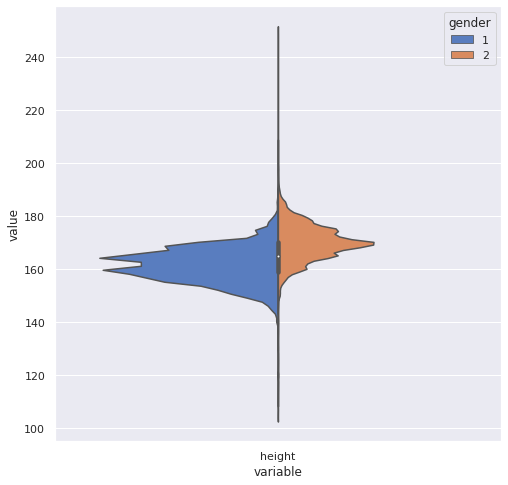

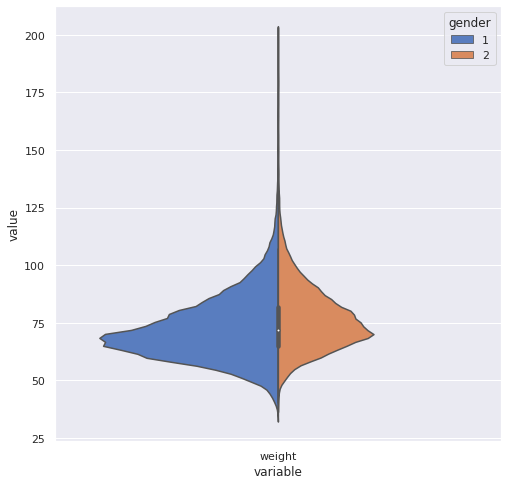

In [34]:
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])

plt.figure(figsize=(8, 8))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    palette="muted", 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False
)

df_melt = pd.melt(frame=df, value_vars=['weight'], id_vars=['gender'])

plt.figure(figsize=(8, 8))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    palette="muted", 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False
)

In [35]:
def corr_for_target(df, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(df.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

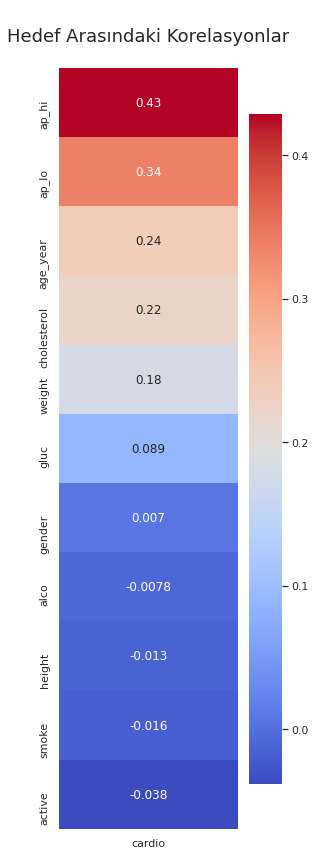

In [36]:
corr_for_target(df, 'cardio', 'Hedef Arasındaki Korelasyonlar')

#<font color='red'> Özellik Mühendisliği </font>

Vücut Kitle İndeksi oluşturuyoruz modele yardımcı olacağını düşünüyorum.

Vücut Kitle İndeksi (VKİ): Vücut kitle indeksi, vücut ağırlığının (kg), boy uzunluğunun metre
cinsinden karesine bölünmesiyle hesaplanır.
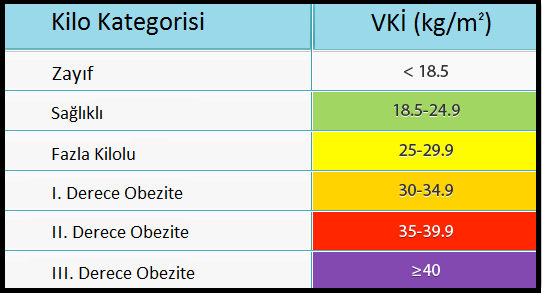

In [37]:
df["vki"] = df["weight"]/ (df["height"]/100)**2

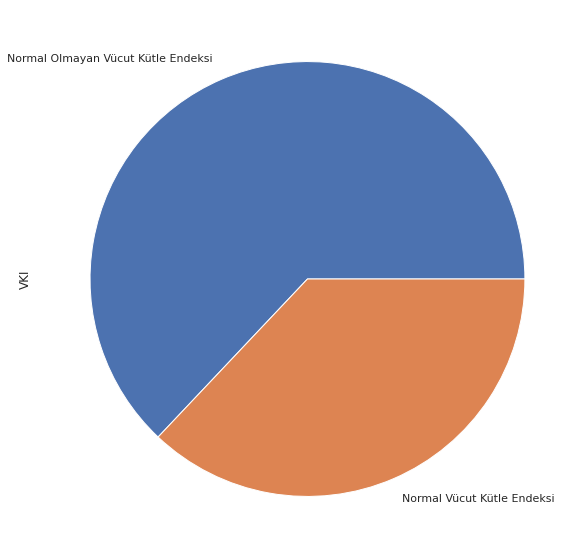

In [38]:
def vki_cat(bmi_score):
  if 18.5 <= bmi_score <= 25:
    return "Normal Vücut Kütle Endeksi"
  else:
    return "Normal Olmayan Vücut Kütle Endeksi"

df["VKI"] = df["vki"].apply(lambda x: vki_cat(x))
df["VKI"].value_counts().plot(kind='pie');

### Avrupa Kardiyoloji Derneği (ESC) ve Avrupa Hipertansiyon Derneği’ne (ESH) göre Hipertansiyon Sınıflaması

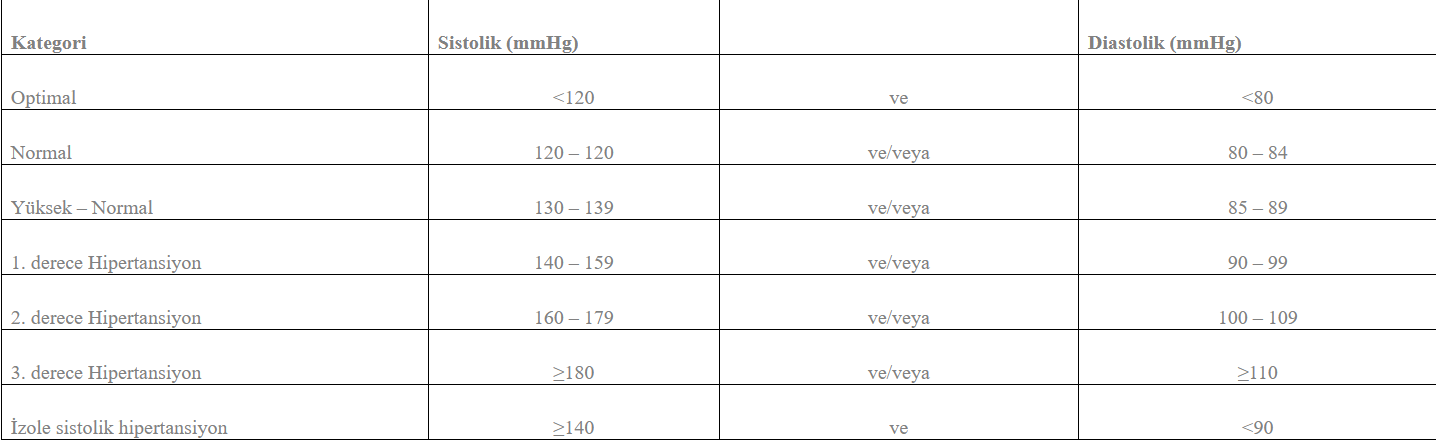

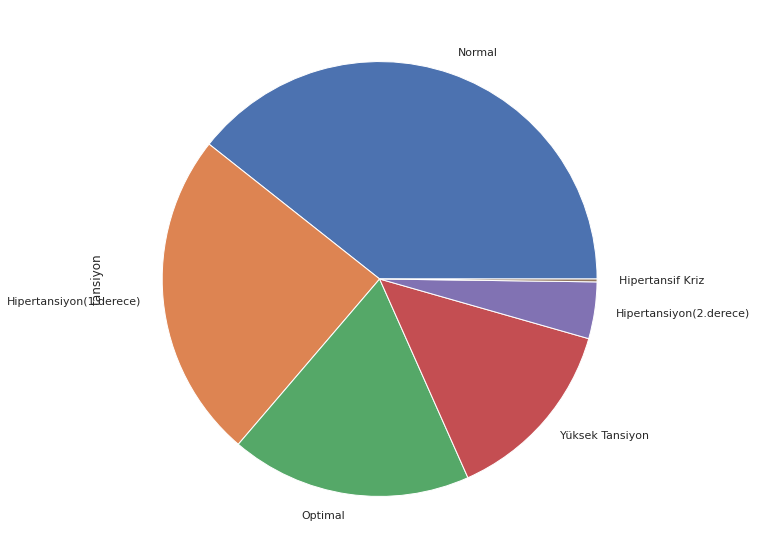

In [39]:
def categorize_tansiyon(x):
  if x['ap_hi'] < 120 and x['ap_lo'] <= 80:
    return "Optimal"
  elif 120 <= x['ap_hi'] <= 129 and x['ap_lo'] <= 80:
    return "Normal"
  elif 130 <= x['ap_hi'] <= 139 or 85 <= x['ap_lo'] <= 89:
    return "Yüksek Tansiyon"
  elif  140 <= x['ap_hi'] <= 159 or 90 <= x['ap_lo'] <= 99:
    return "Hipertansiyon(1.derece)"
  elif  160 <= x['ap_hi'] <= 180 or 100 <= x['ap_lo'] <= 109:
    return "Hipertansiyon(2.derece)"
  elif  (x['ap_hi'] > 180 and  x['ap_lo'] > 120) or (x['ap_hi'] > 180 or x['ap_lo'] > 120):
    return "Hipertansif Kriz"

df['tansiyon'] = df.apply(categorize_tansiyon, axis=1)
 
df["tansiyon"].value_counts().plot(kind='pie');

In [40]:
# Yaşları kategorilendirme
def categorize_age(age_year):
  if 0 < age_year <= 2:
    return "Bebek"
  elif 2 < age_year <= 12:
    return "Çocuk"
  elif 12 < age_year <= 19:
    return "Ergen"
  elif 19 < age_year <= 24:
    return "Genç"
  elif 24 < age_year <= 44:
    return "Yetişkin"
  elif 44 < age_year <= 65:
    return "Orta Yaşlı"
  elif 65 < age_year:
    return "Yaşlı"

df['age_cat'] = df['age_year'].apply(lambda x: categorize_age(x))

In [41]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,vki,VKI,tansiyon,age_cat
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Normal Vücut Kütle Endeksi,Optimal,Orta Yaşlı
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Normal Olmayan Vücut Kütle Endeksi,Hipertansiyon(1.derece),Orta Yaşlı
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,Normal Vücut Kütle Endeksi,Yüksek Tansiyon,Orta Yaşlı
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Normal Olmayan Vücut Kütle Endeksi,Hipertansiyon(1.derece),Orta Yaşlı
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,Normal Vücut Kütle Endeksi,Optimal,Orta Yaşlı
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438,Normal Olmayan Vücut Kütle Endeksi,Normal,Orta Yaşlı
69996,1,158,126.0,140,90,2,2,0,0,1,1,62,50.472681,Normal Olmayan Vücut Kütle Endeksi,Hipertansiyon(1.derece),Orta Yaşlı
69997,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Normal Olmayan Vücut Kütle Endeksi,Hipertansiyon(1.derece),Orta Yaşlı
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Normal Olmayan Vücut Kütle Endeksi,Yüksek Tansiyon,Orta Yaşlı


#<font color='red'>Modelleme </font>

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [64]:
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'LightGBM' :  LGBMClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'ExtraTree' : ExtraTreesClassifier()
}
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]
results

,Accuracy in %,F1-score
Logistic Regression,70.44,0.69
Decision Tree,63.69,0.63
Random Forest,70.48,0.70
Support Vector Machines,71.92,0.69
K-nearest Neighbors,69.13,0.69
XGBoost,73.40,0.72
Gradient Boosting,73.31,0.72
LightGBM,73.41,0.72
AdaBoost,72.90,0.71
ExtraTree,69.22,0.69


## AdaBoost

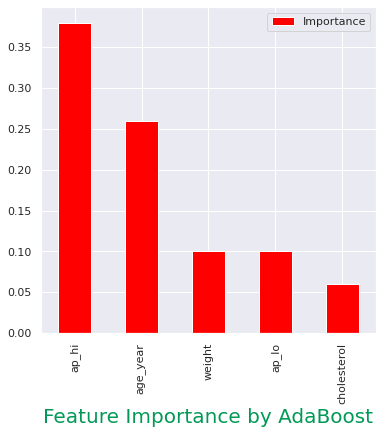

In [65]:
feature_importance = pd.DataFrame({'Importance' : AdaBoostClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = 'red', figsize = (6, 6))
plt.xlabel("Feature Importance by AdaBoost", color = "#019955", fontdict= {"fontsize" : 20});

In [66]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)
y_pred_ada_train = model_ada.predict(X_train)
ada_test_as = metrics.accuracy_score(y_pred_ada, y_test)
ada_train_as = metrics.accuracy_score(y_pred_ada_train, y_train)

print(f"Ada test verisi doğruluk(accuracy) skoru {ada_test_as}")
print(f"Ada train verisi doğruluk(accuracy) skoru {ada_train_as}")
print(classification_report(y_test,y_pred_ada))

Ada test verisi doğruluk(accuracy) skoru 0.729047619047619
Ada train verisi doğruluk(accuracy) skoru 0.7318163265306122
              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10434
           1       0.77      0.66      0.71     10566

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



## XGBoost

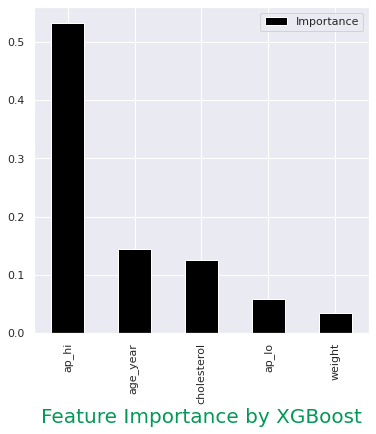

In [67]:
feature_importance = pd.DataFrame({'Importance' : XGBClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#000000', figsize = (6, 6))
plt.xlabel("Feature Importance by XGBoost", color = "#019955", fontdict= {"fontsize" : 20});

In [68]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb_train = model_xgb.predict(X_train)
xgb_test_as = metrics.accuracy_score(y_pred_xgb, y_test)
xgb_train_as = metrics.accuracy_score(y_pred_xgb_train, y_train)

print(f"XGB test verisi doğruluk(accuracy) skoru  {xgb_test_as}")
print(f"XGB train verisi doğruluk(accuracy) skoru  {xgb_train_as}")
print(classification_report(y_test,y_pred_xgb))

XGB test verisi doğruluk(accuracy) skoru  0.7340476190476191
XGB train verisi doğruluk(accuracy) skoru  0.7401224489795918
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10434
           1       0.76      0.69      0.72     10566

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



## LightGBM

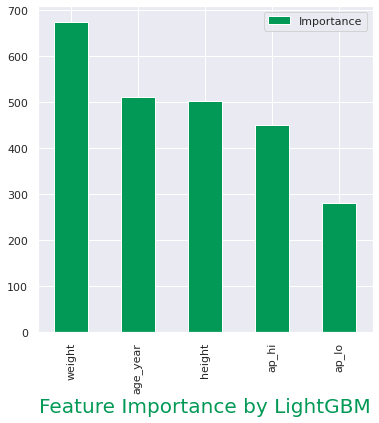

In [69]:
feature_importance = pd.DataFrame({'Importance' : LGBMClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#019955', figsize = (6, 6))
plt.xlabel("Feature Importance by LightGBM", color = "#019955", fontdict= {"fontsize" : 20});

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lgbm = LGBMClassifier(subsample= 1.0, num_leaves=100, n_estimators=500, min_child_samples=46, max_depth=15, learning_rate=0.01)
model_lgbm.fit(X_train, y_train)

y_pred_lgbm = model_lgbm.predict(X_test)
y_pred_lgbm_train = model_lgbm.predict(X_train)
lgbm_test_as = metrics.accuracy_score(y_pred_lgbm, y_test)
lgbm_train_as = metrics.accuracy_score(y_pred_lgbm_train, y_train)

y_pred_test = model_lgbm.predict(X_test)
y_pred_train = model_lgbm.predict(X_train)
    
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)

print(f"LGBM test verisi doğruluk(accuracy) skoru {lgbm_test_as}")
print(f"LGBM train verisi doğruluk(accuracy) skoru {lgbm_train_as}")
print(classification_report(y_test,y_pred_lgbm))

LGBM test verisi doğruluk(accuracy) skoru 0.7337619047619047
LGBM train verisi doğruluk(accuracy) skoru 0.7568775510204082
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10434
           1       0.76      0.70      0.72     10566

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



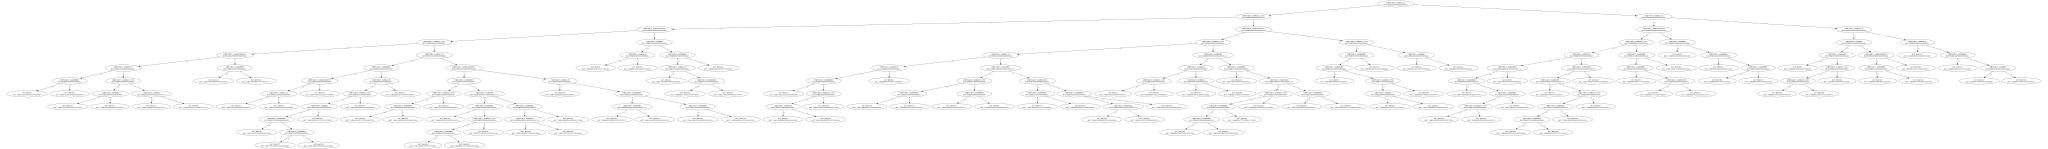

In [71]:
lgb.create_tree_digraph(model_lgbm, tree_index=1)

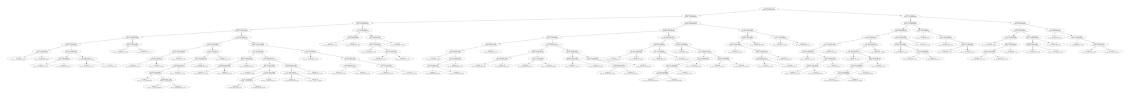

In [72]:
fig2 = plt.figure(figsize=(20, 20))
ax = fig2.subplots()
lgb.plot_tree(model_lgbm, tree_index=1, ax=ax)
plt.show()

#<font color='red'>Model Değerlendirme </font>

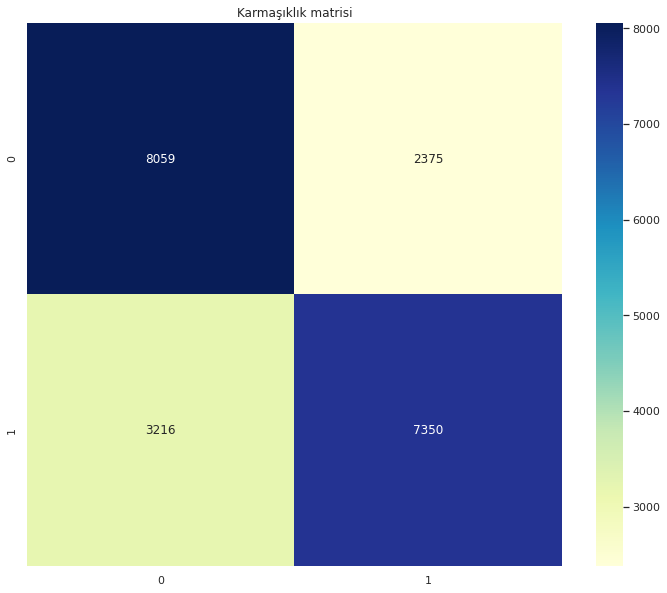

In [73]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lgbm)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Karmaşıklık matrisi', y=1.1);

#### Karmaşıklık matrisi, gerçek değerlerin bilinmekte olduğu bir dizi test verisi üzerinde, bir sınıflandırma modelinin performansını ölçmek için kullanılan bir tablodur.

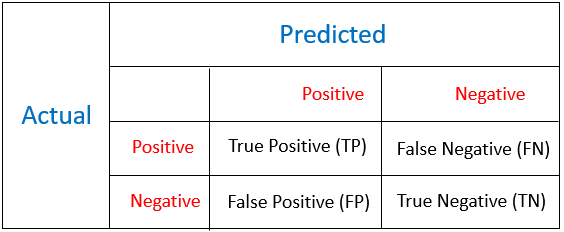

* TP (True Positive ): Test verisindeki değer ile modelin değer ettiği sınıf aynıdır. Doğru sınıflandırma yapmıştır.
* FN (False Negative ):Test verisindeki değer ile modelin ürettiği sınıf farklı. Pozitif ilken negatif sınıflandırılmış. Hatalı sınıflandırma yapmıştır.
* FP (False Positive ) : Gerçek değer negatif iken pozitif sınıflandırılmış. Hatalı sınıflandırma yapmıştır.
* TN (True Negative ): Gerçek değer negatif iken negatif sınıflandırılmıştır. Doğru sınıflandırma yapmıştır.

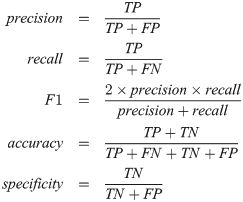

* ### DUYARLILIK ( Sensivity-Precision)
Modelin girdilerden pozitif sınıf etiketini tahmin etmekteki etkililiğini gösterir. Doğru sınıflandırılan pozitif örneklerin toplam pozitif örnek sayısına oranıdır ( FN ayni zamanda doğrudur) sadece pozitif için geçerli.
* ### BELİRLEYİCİLİK (Specifity) 
Modelin girdilerdeki negatif sınıf etiketini tahmin etmedeki becerisidir. Doğru sınıflandırılan negatif örneklerin toplam negatif örnek sayısına oranı ile hesaplanır. (FP aynı zamanda negatifidir)
* ### KESİNLİK( Pozitif Öngörü- Recall)
Doğru sınıflandırılan pozitif örneklerin toplam pozitif tahmin edilen örneklere oranıdır.
* ### F-ÖLÇÜTÜ
Kesinlik ve duyarlık performans değerlendirme ölçütlerinin harmonik ortalamasıdır. Her iki ölçütü birlikte değerlendirme imkanı verir.
* ### DOĞRULUK
Modelin gerçekte doğru sınıflandırdığı örneklerin sayısıdır.
Doğruluk modelin genel olarak doğru olup olmadığını karakterize eder.

In [74]:
y_proba = model_lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)

* ### Roc Eğrisi
Bir sınıflandırma probleminin performansının değerlendirilmesinde AUC — ROC eğrisinden yararlanırız. Herhangi bir sınıflandırma modelinin performansını kontrol etmek için en önemli değerlendirme ölçütlerinden biridir.

* ### AUC: ROC Eğrisi Altındaki Alan
AUC-ROC (Eğri Altındaki Alan — Alıcı Çalışma Karakteristikleri) eğrisidir. AUC, “ROC Eğrisi altındaki alan” anlamına gelir. Bu alanın kapsamı AUC’dir. Kapsanan alan ne kadar büyükse, makine öğrenme modelleri o kadar iyi verilen sınıfları ayırt etmede daha iyidir. AUC için ideal değer 1'dir.

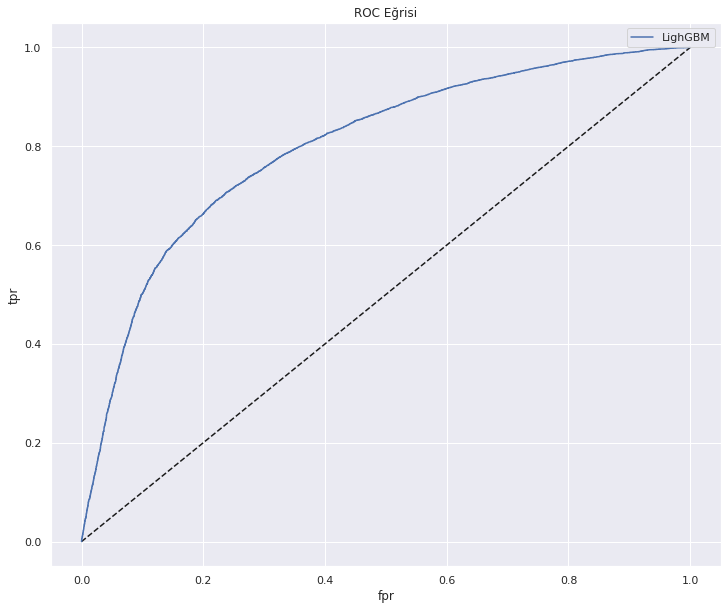

In [75]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'LighGBM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Eğrisi')
plt.legend();

In [86]:
print('AUC Skoru',metrics.roc_auc_score(y_test, y_proba))

AUC Skoru 0.7997324275233949


## Hiperparametre Optimizasyonu
###### Hiperparametre optimizasyonu, bir makine öğrenmesi algoritması için belirlenen başarı metriğine göre en uygun hiperparametre kombinasyonunu bulma işlemidir.

##### GridSearchCV
Modelde denenmesi istenen hiperparametreler ve değerleri için bütün kombinasyonlar ile ayrı ayrı model kurulur ve belirtilen metriğe göre en başarılı hiperparametre seti belirlenir.

In [77]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [84]:
###
# def lgbm_best_params(X_train, X_test, y_train, y_test):
#    lgbm_params = {"n_estimators" : [100,200,500,1000,2000],
#               "subsample" : [0.6,0.8,1.0],
#               "max_depth" : [5,10,15,20,25,30,35],
#               "learning_rate" : [0.1, 0.01, 0.02,0.09],
#               "min_child_samples" : np.arange(2,50),
#               'num_leaves': [100,200,500],
#               }
#    lgbm = LGBMClassifier()
#    random = RandomizedSearchCV(lgbm, lgbm_params, cv=10, random_state=1, n_jobs=-1, verbose=2)
#    random.fit(X_train, y_train)
#    
#    print("En iyi training skoru: {} Bu parametreler ile: {}".format(random.best_score_,random.best_params_))
#    
#    lgbm = LGBMClassifier(**random.best_params_)
#    lgbm.fit(X_train, y_train)
#    y_pred_test = lgbm.predict(X_test)
#    y_pred_train = lgbm.predict(X_train)
#    
#    acc_test = accuracy_score(y_test, y_pred_test)
#    acc_train = accuracy_score(y_train, y_pred_train)
#    print("Test Skoru: {}, Train Skoru: {}".format(acc_test,acc_train))
#    print("Precision Skoru", precision_score(y_test, y_pred_test))
#    print("Recall Skoru",recall_score(y_test, y_pred_test))
#    return
#
#random_lgbm = lgbm_best_params(X_train_scaled, X_test_scaled, y_train, y_test)"""

In [80]:

#Fitting 10 folds for each of 10 candidates, totalling 100 fits
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
#[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
#[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished
#En iyi training skoru: 0.733625 Bu parametreler ile: {'subsample': 1.0, 'num_leaves': 100, 'n_estimators': 500, 'min_child_samples': 46, 'max_depth': 15, 'learning_rate': 0.01}
#Test Skoru: 0.7390714285714286, Train Skoru: 0.7530535714285714
#Precision Skoru 0.7613316661456705
#Recall Skoru 0.6961554952122339


In [81]:

#Fitting 10 folds for each of 10 candidates, totalling 100 fits
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
#[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
#[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished
#En iyi training skoru: 0.734375 Bu parametreler ile: {'subsample': 1.0, 'num_leaves': 100, 'n_estimators': 500, 'min_child_samples': 46, 'max_depth': 15, 'learning_rate': 0.01}
#Test Skoru: 0.7395, Train Skoru: 0.7529464285714286
#Precision Skoru 0.7541564039408867
#Recall Skoru 0.7049935242480933


In [82]:
"""from sklearn.externals import joblib
joblib.dump(model_lgbm, 'final.pkl')
from google.colab import files
files.download('final.pkl')""" #model export

"from sklearn.externals import joblib\njoblib.dump(model_lgbm, 'final.pkl')\nfrom google.colab import files\nfiles.download('final.pkl')"

# <font color='red'>Uygulama </font>

In [87]:
# https://github.com/sefakocakalay/streamlit/blob/main/app.py

In [ ]:
# http://localhost:8501/ app.py

# <font color='red'>Sonuç </font>

* ### Projemizde gpu desteğine ihtiyaç duyacağımızı düşündüğüm için Google Colab ücretsiz gpu desteği sağladığı için burayı tercih ettim.
* ### 70.000 gerçek hasta muayenesinden oluşan verilerimizden yola çıkarak başarımı yüksek bir model oluşturmaya çalıştık.
*### Verilerimiz genel olarak temiz ve düzenliydi o yüzden data preprocessing kısmında çok vakit kaybetmedik.
*### Verimizi default parametreler ile ilk olarak 10 adet makine öğrenmesi modeline soktuk ve genel olarak benzer sonuçlar aldık en yüksek sonuç veren 3 model ile devam ettik.
*### Bir sınıflandırma problemi ile karşı karşıa olduğumuzdan başarı metriklerimizi genel olarak F-1 score, Recall, ROC, AUC, Accuracy, Precision olarak ele aldık.
*### İnsan sağlığını ilgilendiren bir hastalık üzerine tahmin geliştiren bir model yaptığımız için bilimsel olmayan, öznel ve düşüncesiz karar almamalıyız.
*### Özellikle karmaşıklık matrisi bizim için çok önemli bir metrikti çünkü FN (False - Negative) durumunda o kişinin hayatını riske atabiliriz bu yüzden FN'yi çok düşük tutmaya çalıştık.
*### FN (False-Negative)'i ana faktör kabul edersek en uygun modelin <font color='red'> LightGBM    </font>
*### olduğunu görüyoruz.
*### Model Optimizasyonu kısmında ise önce gridsearchCV kullandım fakat pek beklediğim gibi sonuç alamayınca randomizedsearchCV'ye geçtim hiperparametreleri optimal bir seviyeye getirebilmek biraz yorucu oldu.
*### Modelimizi kaydettikten sonra açık kaynaklı bir framework olan streamlit ile modelimizi canlı sisteme entegre ettik.



#<font color='red'> Sonuçlar: </font>
# <font color='red'> Accuracy(Test):0.7337 </font>
# <font color='red'> Accuracy(Train):0.7568 </font>
# <font color='red'> Precision:0.76 </font>
# <font color='red'> Recall:0.70 </font>
# <font color='red'> F1-score:0.72 </font>